The purpose of this exercise is to review what we've discussed, but more importantly to go through the actual steps you would undertake with a new data set.

## Pockets data
(Source: https://pudding.cool/2018/08/pockets/)

In [1]:
import pandas as pd

Read in the data from pockets.csv

In [2]:
pockets = pd.read_csv('./data/pockets.csv')

Show the first few lines of the data

In [3]:
pockets.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7,False


Split out possible targets/metadata and show the first few lines

In [4]:
metadata = pockets[['brand', 'style', 'menWomen', 'cutout']]
metadata.head()

,brand,style,menWomen,cutout
0,Arizona,skinny,women,False
1,Arizona,straight,women,False
2,Ralph Lauren,skinny,women,False
3,Ralph Lauren,straight,women,False
4,Uniqlo,skinny,women,False


Turn into df with just the numeric data and show the first few lines

In [5]:
pockets_n = pockets.drop(columns = ['brand', 'style', 'menWomen', 'fabric', 'name', 'cutout'])
pockets_n.head()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack
0,42.0,14.5,15.0,6.5,16.5,13.0,15.0,12.2,13.7,12.0
1,42.0,14.5,14.0,6.5,16.0,12.5,15.5,12.2,13.0,11.2
2,89.5,13.0,13.5,6.5,14.5,12.0,15.5,13.0,13.5,12.5
3,89.5,13.0,13.5,6.5,14.5,12.0,14.5,13.0,13.0,12.2
4,39.9,13.0,13.0,5.5,14.0,11.5,14.0,12.0,14.2,11.7


## Univariate exploration
Here you should calculate some statistics and make at least one plot to explore the distribution of the individual variables - this should be a plot that shows ALL of the variables (a box plot or strip chart).

Describe the basic stats of the pockets data

In [6]:
pockets_n.describe()

,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack
count,80.000000,80.00000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,80.750000,18.72875,15.65375,6.654375,15.777500,12.81000,15.565000,13.026250,13.521250,11.948750
std,44.551841,4.88724,3.50392,0.960129,1.469864,1.04864,0.922311,0.948783,0.864591,0.889601
min,9.990000,11.50000,9.50000,4.500000,12.000000,11.00000,13.000000,10.500000,11.500000,9.500000
25%,49.950000,14.00000,13.00000,6.000000,14.500000,12.00000,15.000000,12.425000,13.000000,11.500000
50%,73.975000,20.25000,15.00000,6.500000,16.000000,12.60000,15.500000,13.000000,13.500000,12.000000
75%,95.712500,22.50000,17.00000,7.000000,17.000000,13.50000,16.050000,13.700000,14.000000,12.500000
max,249.000000,28.00000,25.00000,9.200000,19.000000,16.00000,17.500000,15.000000,15.500000,14.000000


Make a boxplot of the numeric data pockets_n using **seaborn**

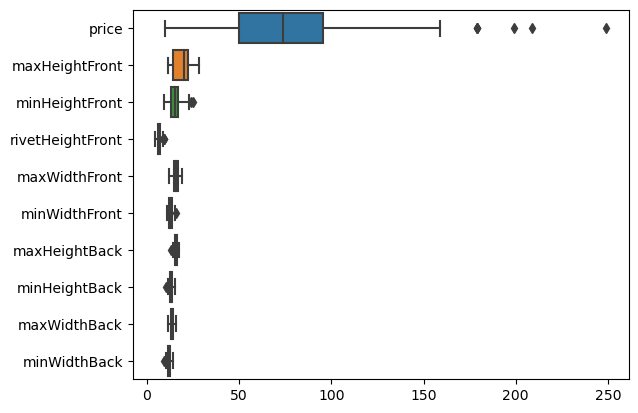

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = pockets_n, orient='h')
plt.show()

Make a stripplot of the numeric data pockets_n using **seaborn**

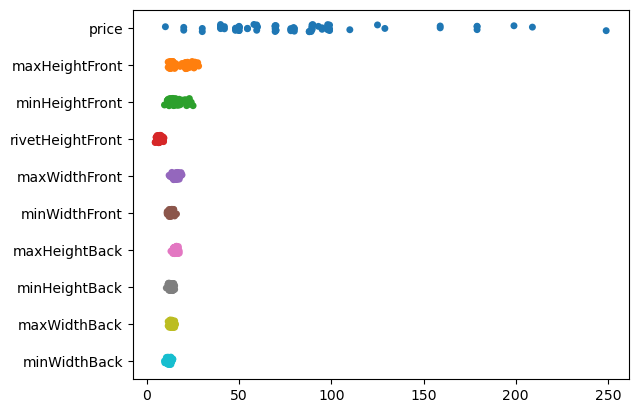

In [15]:
sns.stripplot(data = pockets_n, orient = 'h')
plt.show()

## Bivariate exploration
Here you should look at the pairwise correlations between the variables (this will become more important as we build models). Look for things that are highly correlated. Suggestion: for this many variables, calculate the matrix of correlation coefficients and the plot in a heatmap.

get the **lower left** of the correlation coefficient matrix of pockets_n

In [23]:
import numpy as np
import pandas as pd
#let's try both np and pd
#numpy 
#corr1 = np.corrcoef(pockets_n, rowvar=False)
#pandas
corr2 = pockets_n.corr()

#Then get the lower left of corr
#LL_corr = np.tril(corr1)
#or 
LL_corr = np.tril(corr2)
print(LL_corr)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.07580948  1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.05726307  0.6922398   1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.00408654  0.49195006  0.44184771  1.          0.          0.
   0.          0.          0.          0.        ]
 [-0.05089182  0.37984274  0.42710365  0.32180508  1.          0.
   0.          0.          0.          0.        ]
 [-0.04476144  0.47278469  0.48825307  0.26605009  0.72489098  1.
   0.          0.          0.          0.        ]
 [-0.04940756  0.48248233  0.37265472  0.27105388  0.19325272  0.20322845
   1.          0.          0.          0.        ]
 [ 0.02699044  0.50972103  0.49410216  0.31266181  0.25194488  0.23510309
   0.78841171  1.          0.          0.        ]
 [-0.03979776  0.15670854  0.25734077  0.2334965

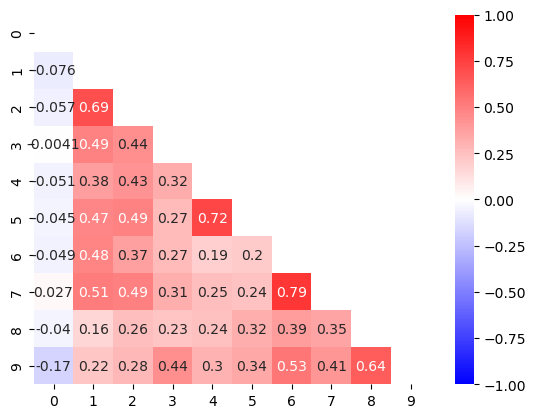

In [24]:
mask = np.triu(corr1)
sns.heatmap(corr1, cmap = 'bwr', vmin = -1, vmax = 1, mask = mask, annot = True)
plt.show()

## Try dimensionality reduction with PCA

Since there are several variables, we will try to look for any kind of patterns in the data with PCA. Suggestions: go back to your univariate analysis to determine if the data needs to be scaled, if so, scale it first; do PCA; print out evr; plot PC1 and PC2 and color in the points by the values of metadata variables to look for patterns. Choose metadata variables that you think might separate the data.

Import the PCA function from sklearn, and assign it to an object pca

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA()

Do a PCA transformation to the numeric data pockets_n

In [27]:
pca_X = pca.fit_transform(pockets_n)

Print out the explained variance ratio

In [28]:
print(pca.explained_variance_ratio_)

[9.78595432e-01 1.60916108e-02 2.47542964e-03 1.08597747e-03
 7.63652380e-04 3.67914379e-04 2.82591749e-04 1.53446204e-04
 1.13382997e-04 7.05628829e-05]


Plot PC1 and PC2, and color in the points by the values of metadata variables to look for patterns. Choose metadata variables that you think might separate the data. Candidate variables: 'menWomen', 'cutout', 'style'

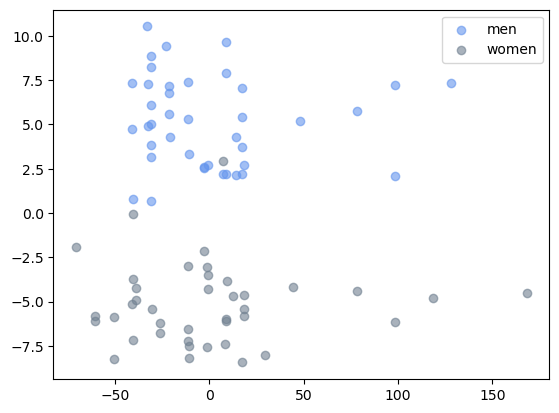

In [31]:
colors = ['cornflowerblue', 'slategrey']
var = metadata['menWomen']
labels = np.unique(var)

for yi in range(2):
    idx = var == labels[yi]
    plt.scatter(pca_X[idx,0], pca_X[idx,1], label = labels[yi], color = colors[yi], alpha = 0.6)
plt.legend()
plt.show()


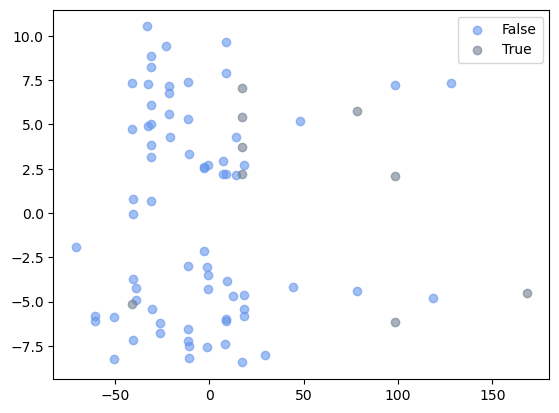

In [32]:
colors = ['cornflowerblue', 'slategrey']
var = metadata['cutout']
labels = np.unique(var)
for yi in range(2):
    idx = var == labels[yi]
    plt.scatter(pca_X[idx,0], pca_X[idx,1], label = labels[yi], color = colors[yi], alpha = 0.6)
plt.legend()
plt.show()

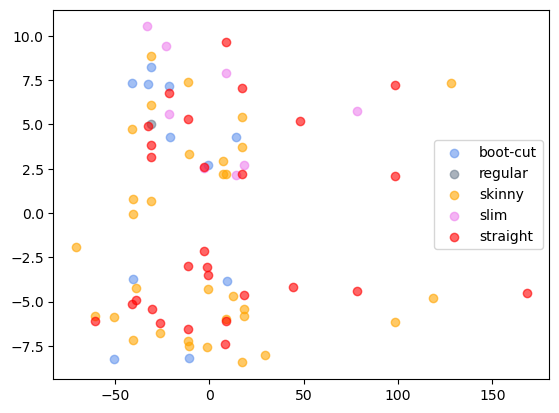

In [34]:
colors = ['cornflowerblue', 'slategrey', 'orange','violet', 'red']
var = metadata['style']
labels = np.unique(var)
for yi in range(len(labels)):
    idx = var == labels[yi]
    plt.scatter(pca_X[idx,0], pca_X[idx,1], label = labels[yi], color = colors[yi], alpha = 0.6)
plt.legend()
plt.show()

## Try tSNE

Use random state 99. Plot your results and shade in the points by metadata as you did for PCA (you can narrow down which metadata to consider based on your previous results). How does the PCA differ from the tSNE?

Import TSNE from sklearn.manifold and assign it to tsne, set random state to 99

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=99)

Perform a TSNE transformation on pockets_n data

In [46]:
tsne_X = tsne.fit_transform(pockets_n)

Plot tsne_X (what is it exactly??), and color in the points by the values of metadata variables to look for patterns. Choose the same metadata as what you did for PCA

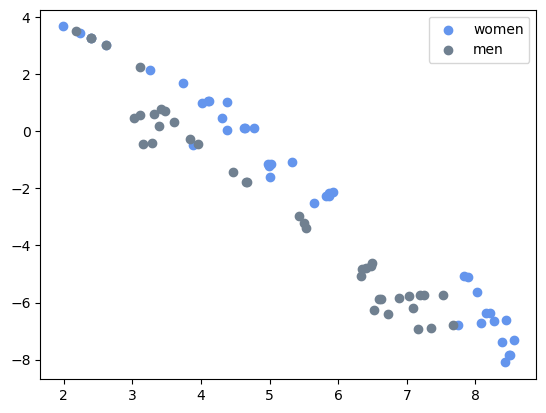

In [47]:
#'menWomen'
#hint: use the Series.unique() function to get the unique labels for the metadata variable
y = metadata['menWomen']
labels = metadata['menWomen'].unique()
colors = ['cornflowerblue', 'slategrey']
for yi in range(len(labels)):
    idx = y == labels[yi]
    plt.scatter(tsne_X[idx, 0], tsne_X[idx, 1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

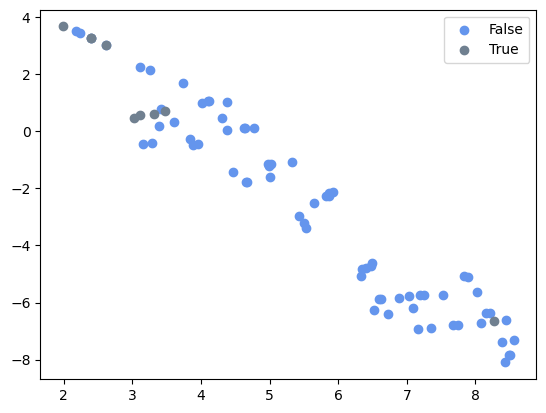

In [48]:
#'cutout'
y = metadata['cutout']
labels = metadata['cutout'].unique()
colors = ['cornflowerblue', 'slategrey']
for yi in range(len(labels)):
    idx = y == labels[yi]
    plt.scatter(tsne_X[idx, 0], tsne_X[idx, 1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

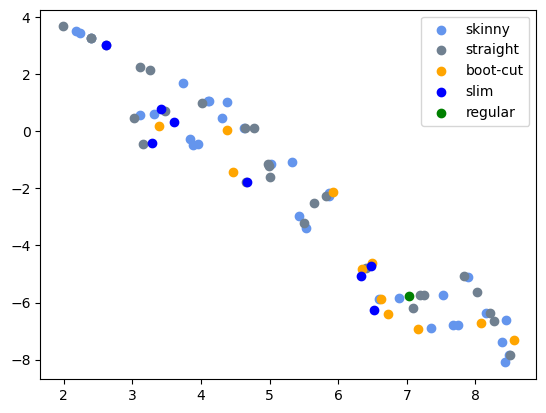

In [49]:
#'style'
y = metadata['style']
labels = metadata['style'].unique()
colors = ['cornflowerblue', 'slategrey', 'orange', 'blue', 'green']
for yi in range(len(labels)):
    idx = y == labels[yi]
    plt.scatter(tsne_X[idx, 0], tsne_X[idx, 1], color = colors[yi],
               label = labels[yi])
plt.legend()
plt.show()

In [50]:
len(metadata['style'].unique())

5